In [198]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [199]:
csv_file_path = '/home/lucas/UFOP/ple_2020/analise_midias_sociais/final-work/data/all_candidates_posts_with_identificator.csv'
df_candidates = pd.read_csv(csv_file_path,encoding = 'utf-8')

In [200]:
df_candidates.head(15)

,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,author
0,2019-03-16T21:15:50+0000,96033897836_10158944569272837,hoje lu comemoramos anos casados ainda apaixon...,hoje lu e eu comemoramos 40 anos de casados ai...,344,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,15515,21,109,2,10,1524,True,alckmin
1,2019-03-13T22:09:50+0000,96033897836_10158937268622837,alunos funcionarios fuzilados escola publica d...,alunos e funcionarios fuzilados em uma escola ...,120,mobile_status_update,None,2606,2,2,547,6,92,True,alckmin
2,2019-02-27T13:04:22+0000,96033897836_10158899426707837,nasceu mateo terceiro filho sophia mario herdo...,nasceu mateo terceiro filho da sophia e do mar...,201,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,7960,32,22,1,2,712,True,alckmin
3,2019-01-25T23:02:43+0000,96033897836_10158806072577837,solidariedade familias povo mineiro pensamento...,minha solidariedade com as familias e com o po...,27,mobile_status_update,None,1046,1,1,105,1,38,True,alckmin
4,2018-11-09T00:21:08+0000,96033897836_10158590520182837,celebrando vida familia agradeco todos felicit...,celebrando a vida com a familia . agradeco a t...,108,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,3485,17,8,0,3,306,True,alckmin
5,2018-10-30T01:28:15+0000,96033897836_10158561677027837,comecou mal defesa liberdade ficou discurso on...,comecou mal . a defesa da liberdade ficou no d...,5174,mobile_status_update,None,14222,2279,108,208,638,1528,True,alckmin
6,2018-10-29T00:56:57+0000,96033897836_10158558725992837,hora felicitar todos eleitos faco pessoa presi...,e hora de felicitar todos os eleitos e o faco ...,1031,mobile_status_update,None,10482,98,22,7,18,780,True,alckmin
7,2018-10-10T20:33:56+0000,96033897836_10158506125162837,ouvimos ontem todo partido decidimos liberar m...,ouvimos ontem todo o partido e decidimos liber...,193,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,2112,55,18,26,251,225,True,alckmin
8,2018-10-08T15:25:15+0000,96033897836_10158499514447837,obrigado todos acreditaram projeto depositaram...,obrigado a todos que acreditaram em nosso proj...,402,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,7401,128,9,434,19,615,True,alckmin
9,2018-10-07T00:00:01+0000,96033897836_10158493056542837,domingo vai escolher presidente voto ajudara d...,domingo voce vai escolher muito mais do que um...,383,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,1935,96,7,3,20,176,True,alckmin


In [202]:
n_posts_with_textual_messages = df_candidates[df_candidates.has_textual_message == True].shape[0]
n_posts_without_textual_messages = df_candidates[df_candidates.has_textual_message == False].shape[0]

print('número de posts com mensagens textuais: {0}'.format(str(n_posts_with_textual_messages)))
print('número de posts sem mensagens textuais: {0}'.format(str(n_posts_without_textual_messages)))

número de posts com mensagens textuais: 19589
número de posts sem mensagens textuais: 1772


In [203]:
# Devemos remover esses posts sem menssagem antes de continuar a nossa análise?

#filter_mask  = df_candidates['has_textual_message'] == True
#df_candidates = df_candidates[filter_mask]
#print('número de posts do df desconsiderando os posts sem menssagens textuais: {0}'.format(str(len(df_candidates))))

In [204]:
# separando o df de treinamento (80%) e o df de testes(20%) de maneira 'embaralhada'
df_training, df_test = train_test_split(df_candidates,train_size=0.7,test_size=0.3,shuffle=True)

In [205]:
print('número de posts do conjunto de treinamento (70%): {0}'.format(str(len(df_training))))
df_training.head(5)

número de posts do conjunto de treinamento (70%): 14952


,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,author
7133,2019-07-31T08:34:07+0000,211857482296579_1537860353029612,assisti cenas horrores presidio vi cenas macab...,- assisti as cenas de horrores no presidio do ...,10323,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/65...,59165,2576,214,55,50,6826,True,bolsonaro
1638,2016-07-15T18:56:38+0000,96033897836_10155609801642837,hoje nova granada entrega novo sistema esgotam...,estive hoje em nova granada para a entrega do ...,88,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t31.0...,714,0,0,1,3,8,True,alckmin
13675,2018-08-23T11:04:11+0000,1216504185136925_1803190686468269,amigos internet venham discutir ideias devolve...,amigos da internet venham discutir as ideias p...,161,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,1401,2,19,0,1,85,True,ciro
13307,2019-04-03T14:33:18+0000,1216504185136925_2127659847354683,mentecapto filho deslumbrado presidente totalm...,este mentecapto filho deslumbrado de um presid...,2421,mobile_status_update,https://external.fplu2-1.fna.fbcdn.net/safe_im...,7493,125,121,688,1480,93,True,ciro
17515,2018-02-09T18:17:45+0000,126351747376464_1864687790209509,obrigada todas mensagens carinhosas recebi dia...,muito obrigada por todas as mensagens carinhos...,106,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,1401,12,132,2,8,325,True,marina


In [206]:
print('número de posts do conjunto de teste (20%): {0}'.format(str(len(df_test))))
df_test.head(5)

número de posts do conjunto de teste (20%): 6409


,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,author
4815,2020-01-08T16:06:33+0000,353551475083023_893924677712364,bolsonaro ignora propria equipe tecnica decide...,bolsonaro ignora sua propria equipe tecnica e ...,852,added_photos,https://scontent-gru2-2.xx.fbcdn.net/v/t1.0-9/...,5552,428,76,122,1202,58,True,amoedo
6579,2020-02-17T15:33:16+0000,211857482296579_1782860928529552,atraves programa caminho escola ministro abrah...,- atraves do programa caminho da escola o mini...,9693,mobile_status_update,None,50984,36,184,5,5,4446,True,bolsonaro
17530,2018-01-26T13:19:59+0000,126351747376464_1848988518446103,foro privilegiado cria casta autoridades publi...,o foro privilegiado cria uma casta de autorida...,524,shared_story,https://scontent.fplu2-1.fna.fbcdn.net/v/t45.1...,3329,12,112,0,17,287,True,marina
5295,2019-04-01T22:01:50+0000,353551475083023_693728524398648,camara deputados aprovou projeto lei premia pa...,a camara dos deputados aprovou um projeto de l...,2925,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,7602,9,40,99,810,166,True,amoedo
9992,2020-02-22T13:39:47+0000,398845206932703_1612345018916043,escola militar negando direito basico organiza...,escola militar negando direito basico a organi...,955,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,1239,38,88,277,1408,24,True,boulos


In [207]:
#============================================================================================
# Implementacao do lda
#============================================================================================

In [208]:
# min_df = 0.02 significa "ignorar termos que aparecem em menos de 2% dos documentos
# max_df = 0.50 significa "ignorar termos que aparecem em mais de 50% dos documentos ".

cv = CountVectorizer(min_df = 0.02)

data_vectorized = cv.fit_transform(df_training['pre_processed_message'])

In [226]:
n_components = 7

model_lda = LatentDirichletAllocation(n_components=n_components, # Number of topics
                                      max_iter=300,
                                      #learning_method='online',
                                      random_state=100,
                                      batch_size=128,            
                                      evaluate_every = -1,       
                                      n_jobs = -1,               
                                     )
model_lda.fit(data_vectorized)

LatentDirichletAllocation(max_iter=300, n_components=7, n_jobs=-1,
                          random_state=100)

In [227]:
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Log Likelihood: ", model_lda.score(data_vectorized)) # Maior, melhor
print("Perplexity: ", model_lda.perplexity(data_vectorized)) # Menor, Melhor
# See model parameters
print(model_lda.get_params())

Log Likelihood:  -337216.8825800555
Perplexity:  105.33830710277235
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 300, 'mean_change_tol': 0.001, 'n_components': 7, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [260]:
# objetivo: tentar encontrar um numero bom de tópicos a fim de conseguirmos destinguir as
# categorias 

'''
#forma antiga
for index, topic in enumerate(model_lda.components_):
    print(f'Top 10 words for #{index}')
    main_words_for_topic = [cv.get_feature_names()[i] for i in topic.argsort()[-10:]]
    print(main_words_for_topic)
    print(str(len(main_words_for_topic)))
    message = ' '
    message = message.join(main_words_for_topic)
    print(message)
    print('\n')
'''
# Mostrar as n principais palavras-chave para cada tópico 
def get_topics(vectorizer=cv, lda_model=model_lda, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (topic_weights).argsort()[-n_words:]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords


topic_keywords = get_topics(cv,model_lda,10)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]

df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,pais,fazer,juntos,obrigado,video,gente,geraldo,todos,vamos,brasil
Topic 1,meio,sociedade,vida,ainda,pode,politica,pais,brasil,ser,governo
Topic 2,reforma,fernando,lula,haddad,hoje,luta,contra,povo,grande,dia
Topic 3,janeiro,jair,casa,vai,sp,obras,regiao,rio,hoje,bolsonaro
Topic 4,nesta,acompanhe,semana,agora,educacao,aovivo,debate,ciro,entrevista,programa
Topic 5,hoje,eduardo,pt,projeto,direitos,nacional,silva,rede,presidente,marina
Topic 6,cidade,seguranca,ano,hoje,saude,pessoas,mil,estado,paulo,novo


In [263]:
classifications = ['alckmin','boulos','haddad','bolsonaro',"ciro",
                   "marina","amoedo"]


# para 12 tópicos - começou bem, mas piorou
#classifications = ['Segundo Turno','Participe','Luta das Mulheres',"Mudar o Brasil","Campanha Eleitoral",
#                   "Propostas e Debate","Emprego","Saúde/Educação/Segurança",
#                   "Programa",""]

#Topics = ["Agradecimento","Verdade","Direita","Polícia","Caminhoneiros", "Distritos Brasileiros", "Entrevista", "Globo", "Corrupção", "Paulo Guedes"]


df_topic_keywords ["Classification"] = classifications

df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Classification
Topic 0,pais,fazer,juntos,obrigado,video,gente,geraldo,todos,vamos,brasil,alckmin
Topic 1,meio,sociedade,vida,ainda,pode,politica,pais,brasil,ser,governo,boulos
Topic 2,reforma,fernando,lula,haddad,hoje,luta,contra,povo,grande,dia,haddad
Topic 3,janeiro,jair,casa,vai,sp,obras,regiao,rio,hoje,bolsonaro,bolsonaro
Topic 4,nesta,acompanhe,semana,agora,educacao,aovivo,debate,ciro,entrevista,programa,ciro
Topic 5,hoje,eduardo,pt,projeto,direitos,nacional,silva,rede,presidente,marina,marina
Topic 6,cidade,seguranca,ano,hoje,saude,pessoas,mil,estado,paulo,novo,amoedo


In [264]:
def predict_topic(text,vectorizer=cv):
    # vetorizacao
    text_vectorized = vectorizer.transform([text])
    # LDA do texto
    topic_probability_scores = model_lda.transform(text_vectorized)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 0:10].values.tolist()
    # inferindo o topico
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    return infer_topic, topic, topic_probability_scores


# Predict the topic
mytext = 'msts'
print(prob_scores)
print(topic)
print(infer_topic)

[[0.01024312 0.43490475 0.0102119  0.0816326  0.01020408 0.34412037
  0.10868317]]
['meio', 'sociedade', 'vida', 'ainda', 'pode', 'politica', 'pais', 'brasil', 'ser', 'governo']



In [265]:
#===========================================================================
# predizendo o topico por de cada uma das mensagens por meio do modelo lda
#===========================================================================

df_test['inferred candidate'] = df_test['pre_processed_message'].apply(lambda text:predict_topic(text,vectorizer=cv)[0])

In [238]:
df_test.head()

,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,author,inferred candidate
4815,2020-01-08T16:06:33+0000,353551475083023_893924677712364,bolsonaro ignora propria equipe tecnica decide...,bolsonaro ignora sua propria equipe tecnica e ...,852,added_photos,https://scontent-gru2-2.xx.fbcdn.net/v/t1.0-9/...,5552,428,76,122,1202,58,True,amoedo,1
6579,2020-02-17T15:33:16+0000,211857482296579_1782860928529552,atraves programa caminho escola ministro abrah...,- atraves do programa caminho da escola o mini...,9693,mobile_status_update,None,50984,36,184,5,5,4446,True,bolsonaro,4
17530,2018-01-26T13:19:59+0000,126351747376464_1848988518446103,foro privilegiado cria casta autoridades publi...,o foro privilegiado cria uma casta de autorida...,524,shared_story,https://scontent.fplu2-1.fna.fbcdn.net/v/t45.1...,3329,12,112,0,17,287,True,marina,1
5295,2019-04-01T22:01:50+0000,353551475083023_693728524398648,camara deputados aprovou projeto lei premia pa...,a camara dos deputados aprovou um projeto de l...,2925,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,7602,9,40,99,810,166,True,amoedo,5
9992,2020-02-22T13:39:47+0000,398845206932703_1612345018916043,escola militar negando direito basico organiza...,escola militar negando direito basico a organi...,955,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,1239,38,88,277,1408,24,True,boulos,0


In [266]:
filter_mask  = df_test['has_textual_message'] == True
df_test = df_test[filter_mask]
print('número de posts do df_test desconsiderando os posts sem menssagens textuais: {0}'.format(str(len(df_test))))

número de posts do df_test desconsiderando os posts sem menssagens textuais: 5870


In [303]:
#===========================================================================
# Calculando a acurácia do modelo para predizer os posts do alckmin
#===========================================================================

count = 0

mask_candidate = (df_test['author'] == 'alckmin')

df_alckmin = df_test[mask_candidate]

number_posts_alckmin = str(len(df_alckmin))


print('Candidato: Geraldo Alckmin')
print('Número de posts no data frame de teste: {0}'.format(number_posts_alckmin))
print('Como esses {0} posts foram classificados no conjunto de teste? (porcentagem)'.format(number_posts_alckmin))
counts = df_alckmin['inferred candidate'].value_counts('alckmin')
print(counts)

Candidato: Geraldo Alckmin
Número de posts no data frame de teste: 1110
Como esses 1110 posts foram classificados no conjunto de teste? (porcentagem)
amoedo       0.358559
bolsonaro    0.213514
alckmin      0.172072
boulos       0.134234
haddad       0.073874
marina       0.024324
ciro         0.023423
Name: inferred candidate, dtype: float64


In [304]:
#===========================================================================
# Calculando a acurácia do modelo para predizer os posts do boulos
#===========================================================================

mask_candidate = (df_test['author'] == 'boulos')

df_boulos = df_test[mask_candidate]

number_posts_boulos = str(len(df_boulos))

print('Candidato: Guilherme Boulos')
print('Número de posts no data frame de teste: {0}'.format(number_posts_boulos))
print('Como esses {0} posts foram classificados no conjunto de teste? (porcentagem)'.format(number_posts_boulos))
counts = df_boulos['inferred candidate'].value_counts('boulos')
print(counts)

Candidato: Guilherme Boulos
Número de posts no data frame de teste: 841
Como esses 841 posts foram classificados no conjunto de teste? (porcentagem)
alckmin      0.267539
haddad       0.255648
ciro         0.164090
boulos       0.114150
amoedo       0.095125
bolsonaro    0.068966
marina       0.034483
Name: inferred candidate, dtype: float64


In [313]:
#===========================================================================
# Calculando a acurácia do modelo para predizer os posts do amoedo
#===========================================================================

mask_candidate = (df_test['author'] == 'amoedo')

df_amoedo = df_test[mask_candidate]

number_posts_amoedo = str(len(df_amoedo))

print('Candidato: João Amoedo')
print('Número de posts no data frame de teste: {0}'.format(number_posts_amoedo))
print('Como esses {0} posts foram classificados no conjunto de teste? (porcentagem)'.format(number_posts_amoedo))
counts = df_amoedo['inferred candidate'].value_counts('amoedo')
print(counts)

Candidato: João Amoedo
Número de posts no data frame de teste: 576
Como esses 576 posts foram classificados no conjunto de teste? (porcentagem)
amoedo       0.350694
boulos       0.338542
alckmin      0.199653
haddad       0.043403
bolsonaro    0.029514
ciro         0.026042
marina       0.012153
Name: inferred candidate, dtype: float64


In [305]:
#===========================================================================
# Calculando a acurácia do modelo para predizer os posts do bolsonaro
#===========================================================================

mask_candidate = (df_test['author'] == 'bolsonaro')

df_bolsonaro = df_test[mask_candidate]

number_posts_bolsonaro = len(df_bolsonaro)

print('Candidato: Jair Bolsonaro')
print('Número de posts no data frame de teste: {0}'.format(number_posts_bolsonaro))
print('Como esses {0} posts foram classificados no conjunto de teste? (porcentagem)'.format(number_posts_bolsonaro))
counts = df_bolsonaro['inferred candidate'].value_counts('bolsonaro')
print(counts)

Candidato: Jair Bolsonaro
Número de posts no data frame de teste: 1003
Como esses 1003 posts foram classificados no conjunto de teste? (porcentagem)
alckmin      0.342971
bolsonaro    0.236291
boulos       0.174477
haddad       0.079761
marina       0.079761
amoedo       0.053838
ciro         0.032901
Name: inferred candidate, dtype: float64


In [309]:
#===========================================================================
# Calculando a acurácia do modelo para predizer os posts do ciro
#===========================================================================

count = 0

mask_candidate = (df_test['author'] == 'ciro')

df_ciro = df_test[mask_candidate]

number_posts_ciro = str(len(df_ciro))


counts = df_ciro['inferred candidate'].value_counts('ciro')
counts

print('Candidato: Ciro Gomes')
print('Número de posts no data frame de teste: {0}'.format(number_posts_ciro))
print('Como esses {0} posts foram classificados no conjunto de teste? (porcentagem)'.format(number_posts_ciro))
counts = df_ciro['inferred candidate'].value_counts('ciro')
print(counts)

Candidato: Ciro Gomes
Número de posts no data frame de teste: 459
Como esses 459 posts foram classificados no conjunto de teste? (porcentagem)
ciro         0.444444
alckmin      0.183007
boulos       0.152505
haddad       0.076253
amoedo       0.065359
bolsonaro    0.050109
marina       0.028322
Name: inferred candidate, dtype: float64


In [311]:
#===========================================================================
# Calculando a acurácia do modelo para predizer os posts do haddad
#===========================================================================

mask_candidate = (df_test['author'] == 'haddad')

df_haddad = df_test[mask_candidate]

number_posts_haddad = str(len(df_haddad))

print('Candidato: Fernando Haddad')
print('Número de posts no data frame de teste: {0}'.format(number_posts_haddad))
print('Como esses {0} posts foram classificados no conjunto de teste? (porcentagem)'.format(number_posts_haddad))
counts = df_haddad['inferred candidate'].value_counts('haddad')
print(counts)

Candidato: Fernando Haddad
Número de posts no data frame de teste: 542
Como esses 542 posts foram classificados no conjunto de teste? (porcentagem)
haddad       0.306273
amoedo       0.188192
alckmin      0.167897
bolsonaro    0.114391
boulos       0.107011
ciro         0.077491
marina       0.038745
Name: inferred candidate, dtype: float64


In [312]:
#===========================================================================
# Calculando a acurácia do modelo para predizer os posts da marina
#===========================================================================

count = 0

mask_candidate = (df_test['author'] == 'marina')

df_marina = df_test[mask_candidate]

number_posts_marina = str(len(df_marina))

print('Candidato: Marina Silva')
print('Número de posts no data frame de teste: {0}'.format(number_posts_marina))
print('Como esses {0} posts foram classificados no conjunto de teste? (porcentagem)'.format(number_posts_marina))
counts = df_marina['inferred candidate'].value_counts('marina')
print(counts)

Candidato: Marina Silva
Número de posts no data frame de teste: 1339
Como esses 1339 posts foram classificados no conjunto de teste? (porcentagem)
marina       0.329350
boulos       0.328603
alckmin      0.132188
ciro         0.061240
amoedo       0.058252
haddad       0.048544
bolsonaro    0.041822
Name: inferred candidate, dtype: float64


Campanha Eleitoral       5
Privilégios Políticos    5
Segundo Turno            4
União                    3
Saúde/Segurança          3
Emprego/Educação         3
Propostas e Debate       3
Luta das Mulheres        2
Debate                   2
Name: topic_classification, dtype: int64


Text(0, 0.5, 'Frequência')

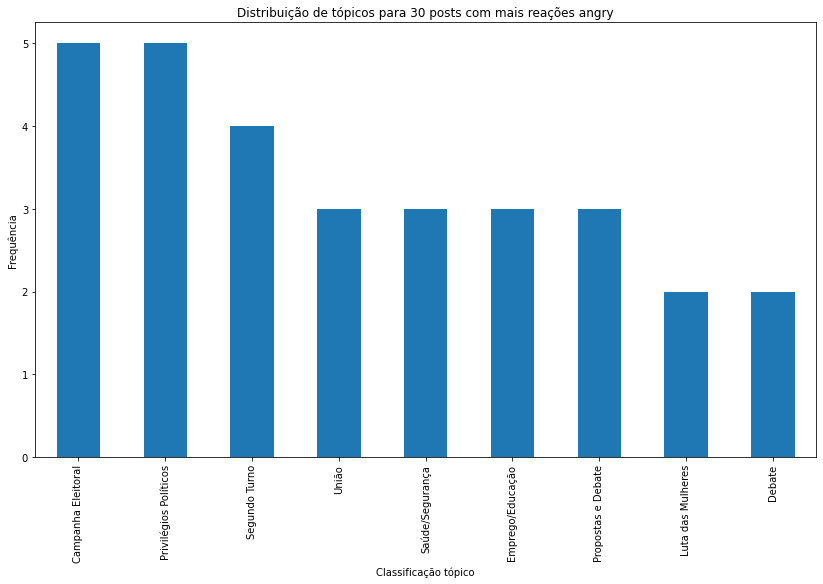

In [246]:
#===========================================================================
# Iterando sobre o df para visualizar as menssagens e seus topicos inferidos
#===========================================================================

topic_keywords = get_topics(cv,model_lda,10)


for index,row in df_test.iterrows():
   print(row['pre_processed_message'],':::',row['inferred candidate'],'\n\n')

bolsonaro ignora propria equipe tecnica decide manter subsidio criado dilma energia solar contrario presidente diz trata criar novo imposto taxar sol sim revisar subsidio custara r bilhoes beneficiara poucos brasileiros atualmente produtores energia solar taxados diretamente producao energia deve mudar revisao subsidios porem produtores pagam rede distribuicao energia utilizandoa distribuir excedente produzido custo distribuicao produtores energia solar pago todos outros usuarios rede placas fotovoltaicas valor elevado apenas cidadaos maior renda empresas podem arcar custos final pobre pagando conta luz rico politicas publicas devem ser tratadas fatos dados evidencias inspirando paises deram certo nestes paises produtores energia solar pagam utilizar rede distribuicao devemos sempre lembrar existe almoco gratis ::: 1 


atraves programa caminho escola ministro abraham weintraub entregou hoje onibus adaptados deficientes municipios paulo carros x bicicletas barcos r milhoesano manutenca

coletiva imprensa paulo haddad ::: 2 


audiencia publica ministro defesa riquezas minerais remuneracao forcas armadas inscrevase tinyurlcomhjtoah ::: 6 


hospital dia hora certa miguel paulista foto cesar ogatasecom ::: 2 


credito imobiliario taxa fixa caixa ::: 0 


criancas levantam alarme biologico avisasse modelo colapsado ainda vigente desenvolvimento ameacando retirarlhes qualquer possibilidade futuro vem socorro saem escolas ensinar a governos empresas todos adultos beaba cuidado vida poluir ar respiramos envenenar agua bebemos enfraquecer terra nutre sobretudo romper laco social caracteriza humanos capazes legar filhos tesouro vida leia artigo poder ::: 1 


marina silva vivo aliancas criou problemas alianca povo brasileiro chegou ::: 5 


pagina oficial facebook seguir pagina criacao acesse cirogomesoficial curtam compartilhem vamos discutir brasil segue wwwfacebookcomcirogomesoficial ::: 0 


[ urgente ] policia paulo quer enquadrar membros mtst detidos greve associacao c

coletiva imprensa registro candidatura lula presidencia ::: 2 


boulos piracicabasp debate estudantes ifsp educacao democracia ::: 4 


jair aumentou gasolina deu ruim inflacao acelera marco maior taxa mes desde ::: 6 


caminho desenvolvimento nacao passa educacao populacao educacao deve comecar desde cedo primeira infancia infelizmente aqui criancas anos creches piorar longo vida ensino publico ruim dura realidade fazem cada jovens anos concluam ensino medio pessimo ensino basico publico universidade publicas recebem alunos maioria escolas particulares minoria pais resultado imagem media anos estudo brasileiro inferior americano anos atras novo educacao basica prioridade somente assim viveremos pais oportunidades desenvolvimento principalmente pobres ::: 1 


degradacao estruturas estado seguranca publica rio janeiro fato sabido sintomas efeitos agora vem tona aspectos chocantes anatomia dessa degradacao noticias arranjo contravencao milicia legislativo estadual rio sabiamos cancer 

obrigado carinho recebi pessoal posto serra azul onde paramos cafezinho lanche quintafeira volta descalvado la entrega novo laboratorio controle microbiologico ::: 6 


afastamento dilma mar galileia israel bolsonaro parabeniza todos brasileiros lutaram momento carlos flavio eduardo bolsonaro ::: 3 


hoje ::: 3 


presidente cenpec educacao cultura sociologa neca setubal avalia reforma ensino medio apresentada governo deixa pontos cegos processo tao complexo pode aumentar desigualdade fato ter sido feito medida provisoria tende pegar caminho impede devido debate leiam entrevista completa ::: 4 


recentemente parana anunciamos diretrizes plano governo agronegocio agro precisa previsibilidade confianca trabalhar estabilidade economica maior continuidade politicas publicas vamos dar melhores condicoes setor geraldopelobrasil ::: 1 


desastre pt temer pais parou crescer alckmin reformas volta confianca reducao impostos setor produtivo retomada economia debatesbt geraldo ::: 0 


confira

serie avisamos quase anos atras cerco permanecera firme forte insaciavel historia politica brasileira passo atras costuma ser seguido dois frente sim novos recuos diga geni pedradas ::: 1 


aovivo ii frente todos acreditam futuro nacao evento organizado diretorio central estudantes universidade fortaleza dce unifor compartilhe ::: 4 


meio crise historica pais irresponsabilidade partidos politicos cidadao brasileiro senadores favoraveis aumento funcionalismo deveriam hoje encontrar desempregados explicar voto onde virao recursos ::: 1 


uploaded new video to their channel ::: 0 


tarde capital participei abertura apas congresso feira negocios supermercados maior encontro setor mundo sendo importante intercambio empresarios consumidores fornecedores poder publico supermercados paulistas correspondem faturamento setor pais empregam cerca mil pessoas ::: 1 


idilvan alencar maiores responsaveis revolucao transformando educacao publica ceara melhor brasil ::: 6 


ciro fala agora aovi

campanha precisa queremos inverter logica financiamento campanhas eleitorais queremos muitos doando pouco vez poucos doando doe marinasilvaorgbrdoacao ::: 1 


respeito povo brasileiro ::: 2 


onu levei palavra firme brasil dando voz verdadeiros anseios valores amado povo construindo pais prospero onde liberdade inviolabilidade soberania vontade brasileiros tres alicerces darao sustentacao ::: 1 


horas jornal estado paulo partir amanha disponibilizarei toda entrevista segue resumo feito proprio estadao ::: 6 


parou estudar quer retomar estudos conhece alguem nesta situacao eja educacao jovens adultos matriculas abertas todo estado inscrever basta ir unidade ensino proxima documento identidade comprovante residencia historico escolar ::: 6 


marina silva reeleicao barack obama presidencia eua vitoria demografia concordo miriam leitao disse hoje manha crise economica determinou regras nestas eleicoes sim demografia mulheres negros hispanicos decidiram eleicoes norteamericanas grupo

centro municipal adocao caes gatos animais situacao maustratos cuidados centro municipal adocao caes gatos inauguramos inicio ano recebem todos cuidados cirurgicos recuperados podem ser adotados bom dia ::: 1 


todos deputados alerj rio janeiro seguissem exemplo anos economizados aproximadamente r milhoes cofres estado sofre grave crise novo defende brasil politicos valorizem dinheiro impostos ::: 6 


encontre pai aqui servico gratuito resultado parceria poupatempo ministerio publico estado paulo sendo expandido todo estado hoje poupatempo itaquera entregamos primeiras certidoes ::: 6 


hoje contra golpe defesa casa vida entidades presenca presidenta dilma urbanistas movimentos populares ::: 3 


maria cecilia luiza carolina irmas deixaram mensagem apoio novo brasil obrigado vote medo vote vote joao amoedo ::: 0 


via twitter geanluca lorenzon hoje presidente jair bolsonaro assinou regulamentacao lei liberdade economica muda todo regime regulacao restricao produtos servicos brasil 

ucranianos rechacados pt congresso descendentes ucranianos parana vao buscar apoio congresso rechacados pt tratamento dispensado deputada maria corina venezuela yoani sanches blogueira cubana ramona rodrigues medica cubana ainda gente acredita turma lutou democracia brasil verdadeira intencao esquerda brasil ::: 0 


ontem visitei horta comunitaria girassol sebastiao maior horta urbana distrito federal onde recebida coordenadora hosana alves precandidata deputada federal todos produtos livres agrotoxicos organicos servem fonte renda agricultores alem alimentar moradores baixa renda regiao otimo exemplo iniciativa sociedade inspirar servir referencia todos acompanhada portavozes nacionais rede sustentabilidade lais garcia pedro ivo exsecretario meio ambiente df precandidato deputado distrital andre lima final semana primeira reuniao novo elo nacional rede discutir vamos contribuir superar enormes desafios pais feliz trabalho portavozes nacionais outras coordenacoes rede seguindo logica 

agnaldo timoteo jair bolsonaro assista final emocionante devemos deixar brasil melhor ::: 3 


dono instituto parana pesquisas fala chances jair bolsonaro ir turno ::: 3 


nesta semana exprefeito haddad voltou defender regulacao liberal midia entrevista interferencia governo veiculos imprensa intuito isolar mundo politicopartidario mundo comunicacao sic cidadao todo direito saber acontece politica pt propoe verdade forma censura novo contrario defende liberdade imprensa liberdades individuais queremos pais livre transparente novo brasil vem ai ::: 1 


adnet ridicularizando bolsonaro avenida preco parabens clemente ::: 3 


katia abreu fala eleitores indecisos brasil todo ::: 0 


hoje partir h marina silva entrevistada vivo jornalista mario sergio conti programa dialogos globonews acompanhem tv globonews play entrevista reapresentacao nesta sexta h h sabado h ::: 4 


brasil agora vende areas potencial niobio atual governo poderia impedir tal crime contrario envia ministro china rati

livro belo horizonte flavio bolsonaro ::: 3 


direitos conquistas conquistas devem ser tratadas favores euvotomarina ::: 5 


assista agora entrevista marina silva programa roda viva tv cultura internet marinarodaviva ::: 4 


participo hoje junto amigo governador flavio dino semana economista luis ma participe ::: 4 


livros menos armas pt anos foto ricardo stuckert ::: 1 


porque hoje sabado pouco humor pagina facebook bolsonaro zuero fez saudavel brincadeira passou nessa semana congresso sob titulo bolsonaro rege orquestras panelas zueiro fez sorrir mim assista bom sabado domingo ::: 3 


dia aniversario moleque velho flavio bolsonaro deus ilumine caminho grande abraco garoto ::: 2 


patricia mae jovem negra teto conheca historia mulher oportunidade revolucionar vida partir luta mtst movimento trabalhadores semteto ::: 2 


adivinha vai fugir debates equipega ::: 3 


bora discutir continuidade luta resistencia medo odioa luta continua praca roosevelt sp hrs logo estara ar event

datena conversa jair bolsonaro vivo ::: 3 


marina silva deu longa entrevista coluna direto fonte sonia racy estadao dia agosto brasilia parte conversa publicada hoje ::: 2 


fernando haddad concede coletiva blogueiros plano lula governo planolula ::: 2 


fundamental neste diadaamazonia considerarmos instrumentos protecao florestas brasileiras entramos setembro c possibilidade ver derrubada leis sustentam biomas codigo florestal participe movimento defesa florestas q apontado propostas p sairmos impasse migremedg ::: 0 


ciro gomes participa neste momento congresso federacao interestadual metalurgicos metalurgicas brasil fitmetal guarulhos sp ::: 0 


gestao publica devemos incentivar disputa pois faz capitalismo trabalhar favor povo competitividade estado ganhou nova fabrica trens gerando emprego renda comprou trens valores baixos gerando economia cofres publicos ::: 6 


populacao carlos passa contar alimentacao qualidade apenas r cidade inauguramos hoje restaurante bom prato est

sabia parlamentares rede atuaram impedir votacao anistia pratica caixa saiba ::: 5 


entrevista radio itatiaia ::: 4 


existe paulistano nascimento paulistano coracao existe paulistano vontade feliz aniversario paulo ::: 6 


mil pessoas receberam novas moradias dias governo federal investimentos ministerio desenvolvimento regional habitacao alcancaram r bilhoes acoes oferta agua nordeste revitalizacao rio araguaia destaques diasdegoverno ::: 1 


participo partir h especial forum social tematico transmissao vivo tvepublicars ebcnarede ::: 4 


temer insiste manobra proteger braco direito governo investigacoes operacao lavajato manter foro privilegiado wellington moreira franco presidente recriou meio medida provisoria secretaria geral presidencia republica mp sido apresentada congresso perde validade amanha ter sido colocada votacao rede sustentabilidade ajuizou nesta quinta stf adin acao direta inconstitucionalidade impedir edicao dessa nova medida provisoria argumento desvio final

hoje durante operacao secretaria estado saude paulo acabar focos proliferacao mosquito dengue evento faz parte semana estadual mobilizacao contra dengue estende dia ::: 2 


ministro confundiu dias ::: 0 


chuvas fortes chegam verao novamente assistimos cenas tragicas transbordamento rios queda encostas barreiras alagamentos cidades inteiras afetando milhares pessoas instrumentos tecnicos recursos avaliar riscos adotar medidas prevencao fatores politicos impedem milhoes brasileiros finalmente deixem ser vitimas dessas catastrofes segundo contas abertas avanco sistema prevencao desastres demandas populacoes vulneraveis somente atendidas regiao muitos eleitores enquanto pequenas localidades sempre ficam nunca ::: 1 


fernando haddad candidato lula presidencia participa debate aparecida ::: 2 


estimativa organizacao mundial saude aponta medicamentos vendidos brasil falsificados facil ser processado falsificar bolsa grife medicamento contra cancer porque sistema rastreamento produtos s

contra direita ajuste fiscal lado verdade surgiram serie convocatorias paralelas reduzindo ato luta contra golpismo falar ajuste direitos defendendo governo dilma outro lado disputa real significado ato dia sendo utilizada grupos sectarios esquerda carimbar ato consequentemente mtst governistas nenhuma novidade trata puristas sempre atos unitarios incluindo paulo tom claro contra direita ajuste fiscal governo contra agenda brasil ponto demarca unidade ::: 2 


ministro divulga marca israel faz agua ar brasil empresa eficiente ::: 0 


cena greta malala juntas forte diante desafios necessidades tempo duas jovens tornaram inquestionavelmente investidas autoridade coragem legitimidade integridade causas lutas representam malala lutou verdadeira gigante meninas realidade politica social cultural pudessem frequentar escolas paquistao greta iniciou greves clima transformando ruas pracas verdadeiras salas aula etica ciencia bom senso politico espalharam redor mundo malala brincou unica amiga 

vejam aqui passo passo assinar ficha apoio criacao rede sustentabilidade rede precisa obter mil assinaturas fichas apoio obter registro partido politico possivel colaboracao vamos criar grande movimento cidadania importante apoiar criacao rede filiarse partido significa responsabilidade legal acesse ::: 0 


pra acreditar mudancas gente quer feitas politicos gente acho ::: 0 


agora hora virada mobilizacao continua neste fim semana caminhadas planfletagens adesivacos bandeiracos muitos eventos levar geraldo ana amelia segundo turno vamos tomar ruas fazer maior festa todo brasil participe leve amigos familiares vamos todos juntos confira programacao completa informacoes contato geraldo geraldogeraldo equipega ::: 0 


bom dia golpistas ontem frente povo medo escritorio presidencia ::: 2 


cironopanico reparebem ::: 0 


mae gerando crianca crianca gerando mae avo ::: 0 


fernando haddad vice chapa lula participa ato campanha piaui ::: 2 


artigo hoje folha marina pergunta ainda poss

dei entrevista programa super manha alagoas respondi pergunta fernando haddad ::: 2 


vamos chegar lugar nenhum pais dividido marina ::: 0 


repressao absurda pm contra ato reducao tarifa tatica sociopata pm paulo reprimiu prendeu feriu manifestantes hoje mesma pm mata periferia mesma pm podera massacrar vila soma domingo todo apoio luta contra aumento tarifa haddad alckmin ::: 2 


general cupertino major vitor hugo goias ::: 0 


marina silva pedro simon porto alegre participar agenda campanha candidatos sebastiao melo pmdb juliana brizola pdt prefeitura porto alegre participou inauguracao comite coligacao proporcional rede psb cidade lado beto albuquerque nesta quinta marina continuidade agenda rio grande sul cidades canoas porto alegre saiba ::: 5 


credito foto guilherme lara campos ::: 0 


blumenau sc ::: 0 


novaeleicao nemdilmanemtemer julgatse ::: 0 


pratique solidariedade colabore campanha periferiasemfome ::: 2 


hoje assinei decreto expansao programa banda larga pop


novo parque batizado candido portinari homenagem grande artista brasileiro nascido interior paulista elevou nome brasil circuito internacional artes ::: 2 


pouco mes pagamos r bilhoes impostos dinheiro sai orcamento familias infelizmente alimenta estado inchado burocratico incapaz fornecer bons servicos publicos novo quer estado simples liberdade priorize essencial educacao seguranca saude ::: 6 


vereador rio janeiro quer criar reserva mercado cervejas artesanais estadios intervencao estatal cria restricoes resultara produtos caros capital fluminense enfrenta muitos problemas servicos essenciais precarios muitos lugares faz sentido dinheiro cidadao usado camara discutir projetos assim novo defende economia livre aberta qualquer reserva mercado sai perdendo sempre consumidor ::: 1 


urgente lutadora mtst baleada durante manifestacao sp semteto edilma aparecida vieira santos anos acabou ser baleada durante manifestacao ocupacao joao goulart mtst rumo prefeitura itapecerica serra re

municipios criada regiao metropolitana vale paraiba litoral norte ::: 3 


rede promoveu brasilia seminario nacional organizacao rede sustentabilidade onde discutidos rumos partido legalizado meios atualizarmos politica neste fim semana reuniao discutirmos reforma politica avaliarmos conjuntura politica economica pais destaque alem marina silva portavozes rede bazileu margarido gabriela batista fotos leo cabral ::: 5 


ato defesa florestas desenvolvimento sustentavel ::: 3 


agora avenida paulista ::: 4 


salarios funcionalismo publico acima teto constitucional superior r mil fazem sentido normalmente durante crise menos ainda lobby elite funcionalismo publico federal forte porem forca populacao maior vamos vencer luta conte novo ::: 1 


siga twittercomjoaoamoedonovo vote posicionei anteriormente favor prisao possa ser realizada apos condenacao segunda instancia ::: 1 


bolsonaro atalho pt precisa voltar poder pois sempre votou igual partido congresso pt atalho desastre ainda maio


impopular injusto deixar conta previdencia pobres futuras geracoes ::: 0 


geraldo alckmin vai fazer bolsa familia impostos conversa boa cafe alckmin gravado campina grande paraiba veja respostas precandidato equipepsdb preparadoparaobrasil cafecomalckmin ::: 0 


sempre digo ganhos importantes sociedade devem ser institucionalizados futuramente subtraidos operacao lava jato demais operacoes pf mpf contra corrupcao sistemica conquista sociedade brasileira conquistas apenas poderes estado serem desfeitas demais poderes hora mobilizarmos garantir valiosa conquista saiba dez medidas combate corrupcao impunidade propostas ministerio publico federal virou projeto lei ::: 1 


marina silva miro teixeira senador caxias rj ::: 5 


todo brasileiro quer pais corrupcao impunidade deve continuar lutando lei igual todos ::: 1 


aovivo sonia bone guajajara participa mariana godoy entrevista rede tv acompanhe agora ::: 4 


presidente argentino alberto fernandez vice cristina kirchner preparando 